## Final Project Submission

Please fill out:
* Student name: Gabriel Araujo
* Student pace: part time
* Scheduled project review date/time: 6/9/20 @ 5:00 PM
* Instructor name: James Irving 
* Blog post URL: https://learn.co/blog/blog_posts/38433/edit


# INTRODUCTION

**Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. I was hired to help them better understand the movie industry. My team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. I must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.**

# IMPORTING

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#   WEBSCRAPING TRIAL CODE

In [5]:
# #PAGE TO GET DATA FROM
# html_page = requests.get('https://www.themoviedb.org/movie/top-rated?page=143')
# soup = BeautifulSoup(html_page.content, 'html.parser')

In [6]:
# # GETTING SPECIFIC MOVIE URL TO EXTRACT THE DATA AND ADDING IT TO A LIST
# base_url = 'https://www.themoviedb.org/'
# movies_data = soup.find('section', id='media_results')
# movie_entries = movies_data.findAll('a', class_='image')
# movie_titles = []
# movie_pages = []

# #LINK CONSISTS OF BASE_URL LINK + MODIFIED MOVIE TITLE
# for entry in movie_entries:    
#     title = entry.get('title')
#     ext_1 = entry.get('href').split('/movie/')
#     ext_2 = title.replace(' ','-').replace('/','-')
#     url = base_url+'movie/'+ext_1[1]+'-'+ext_2
#     movie_titles.append(title)
#     movie_pages.append(url)

In [7]:
# movie_titles

In [8]:
# #TRIAL TO GET DATA FROM SPECIFIC PAGE
# html_page_2 = requests.get(movie_pages[15])
# soup_2 = BeautifulSoup(html_page_2.content, 'html.parser')

# #GETTING CAST INFORMATION
# html_page_3 = requests.get(movie_pages[15]+'/cast')
# soup_3 = BeautifulSoup(html_page_3.content, 'html.parser')
# print(movie_pages[15]+'/cast')

In [9]:
# # for i in list(range(0,20)):
#     html_page_2 = requests.get(movie_pages[i])
#     soup_2 = BeautifulSoup(html_page_2.content, 'html.parser')
#     html_page_3 = requests.get(movie_pages[i]+'/cast')
#     soup_3 = BeautifulSoup(html_page_3.content, 'html.parser')
    
#     #GETTING MOVIE TITLE
       
#     specific_movie_data_1 = soup_2.find('div', class_='single_column')
#     try:
#         title = specific_movie_data_1.find('h2').text.split('(')[0].strip()
#         print(title)
#     except:
#         title = None
#         print(title)
    
#     #GETTING RELEASE DATE
#     try:
#         release_date = specific_movie_data_1.find('span',class_='release').text.strip().split('(')[0]
#         print(release_date)
#     except:
#         release_date = None
#         print(release_date)
    
#     #GETTING GENRE LIST
#     try:
#         genre_list = []
#         for genre in specific_movie_data_1.find('span',class_='genres').findAll('a'):
#             genre_list.append(genre.text)
#         print(genre_list)
#     except:
#         genre_list = None
#         print(genre_list)
    
#     #GETTING LENGTH OF MOVIE
#     try:
#         run_time = specific_movie_data_1.find('span',class_='runtime').text.strip()
#         print(run_time)
#     except:
#         run_time = None
#         print(run_time)
        
#     #GETTING MOVIE CERTIFICATION
#     try:
#         certification = specific_movie_data_1.find('span',class_='certification').text.strip()
#         print(certification)
#     except:
#         certification = None
#         print(certification)
    
#     #GETTING AVERAGE MOVIE RATING
#     try:
#         user_score = specific_movie_data_1.find('div',class_='percent').find('span').get('class')[1].split('-r')[-1]
#         print(user_score)
#     except:
#         user_score = None
#         print(user_score)
    
#     #GETTING LANGUAGE, BUDGET, AND REVENUE FROM FACTS LEFT_COLUMN
#     specific_movie_data_2 = soup_2.find('section', class_='facts left_column')
#     for data in specific_movie_data_2.findAll('p'):
#         if data.text.split()[1] == 'Language':
#             original_language = data.text.split()[-1]
#             print(original_language)
            
#         #USED NESTED IF STATEMENTS BECAUSE SOME MOVIES DON'T HAVE BUDGET OR REVENUE DATA
#         elif data.text.split()[0] == 'Budget':
#             if data.text.split()[-1] == '-':
#                 movie_budget = None
#                 print(movie_budget)
#             else:
#                 movie_budget = int(data.text.split()[-1].strip('$').replace(',','').replace('.00',''))
#                 print(movie_budget)
#         elif data.text.split()[0] == 'Revenue':
#             if data.text.split()[-1] == '-':
#                 movie_revenue = None
#                 print(movie_revenue)
#             else:        
#                 movie_revenue = int(data.text.split()[-1].strip('$').replace(',','').replace('.00',''))
#                 print(movie_revenue)
                
#     #GETTING MOVIE KEYWORDS
#     specific_movie_data_3 = soup_2.find('section',class_='keywords right_column')
#     keyword_list = []
#     for keyword in specific_movie_data_3.findAll('a'):
#         keyword_list.append(keyword.text)
#     print(keyword_list)
    
#     #GETTING LIST OF ACTORS
#     specific_movie_data_4 = soup_2.find('ol',class_='people scroller')
#     actors_list = []
#     #USED TRY BECAUSE SOME PAGES ARE MISSING ACTORS DATA
#     try:
#         for actor in specific_movie_data_4.findAll('p'):
#             if actor.find('a') != None:
#                 if actor.find('a').text != 'View More ':
#                     actors_list.append(actor.find('a').text)
#         print(actors_list)
#     except:
#         actors_list.append(None)
#         print(actors_list)
        
#      #GETTING DIRECTOR'S NAME
#     try:
#         specific_movie_data_5 = soup_3.findAll('section',class_='panel pad')[1]
#         #print(specific_movie_data_5)
#         count = 0
#         crew_list = []
#         director_list = []
#         for crew_member in specific_movie_data_5.findAll('p'):
#             count += 1
#             crew_list.append(crew_member)
#             if crew_member.text.strip() == 'Director':
#                 director_position = count-2
#                 director = crew_list[director_position].text
#                 director_list.append(director)
#         print(director_list)
#         print('\n')
#     except:
#         director_list = None
#         print(director_list)
# #writer = crew_list[writer_position].text
# #print(writer)
# #visual_prod = crew_list[visual_position].text
# #print(visual_prod)

# WEBSCRAPPING FUNCTIONS

In [10]:
#FUNCTION TO RETRIEVE URL FOR THE NEXT PAGE
def next_page(base_url):
    next_page_num = int(base_url.split('=')[-1]) +1
    base_url = base_url.split('=')[0] + '='+ str(next_page_num)
    return(base_url)

In [11]:
#TESTING FUNCTION
next_page('https://www.themoviedb.org/movie/top-rated?page=1')

'https://www.themoviedb.org/movie/top-rated?page=2'

In [12]:
#Function to Scrape all of the Movies on the Given Movies Page
def scrape_movies_list(base_url):
    html_page = requests.get(base_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    base_movie_url = 'https://www.themoviedb.org/'
    movies_data = soup.find('section', id='media_results')
    movie_entries = movies_data.findAll('a', class_='image')
    movie_titles = []
    movie_pages = []
    df_list = []
    for entry in movie_entries:    
        title = entry.get('title')
        ext_1 = entry.get('href').split('/movie/')
        ext_2 = title.replace(' ','-').replace('/','-')
        url = base_movie_url+'movie/'+ext_1[1]+'-'+ext_2
        movie_titles.append(title)
        movie_pages.append(url)
    for movie in movie_pages:
        time.sleep(.2)
        html_page_2 = requests.get(movie)
        soup_2 = BeautifulSoup(html_page_2.content, 'html.parser')
        html_page_3 = requests.get(movie+'/cast')
        soup_3 = BeautifulSoup(html_page_3.content, 'html.parser')
        specific_movie_data_1 = soup_2.find('div', class_='single_column')
        title = specific_movie_data_1.find('h2').text.split('(')[0].strip()
        
        #GETTING MOVIE TITLE
        specific_movie_data_1 = soup_2.find('div', class_='single_column')
        try:
            title = specific_movie_data_1.find('h2').text.split('(')[0].strip()
            
        except:
            title = None
            
        #GETTING RELEASE DATE
        try:
            release_date = specific_movie_data_1.find('span',class_='release').text.strip().split('(')[0]
            
        except:
            release_date = None            

        #GETTING GENRE LIST
        try:
            genre_list = []
            for genre in specific_movie_data_1.find('span',class_='genres').findAll('a'):
                genre_list.append(genre.text)
            
        except:
            genre_list = None
            
        #GETTING LENGTH OF MOVIE
        try:
            run_time = specific_movie_data_1.find('span',class_='runtime').text.strip()
            
        except:
            run_time = None
            
        #GETTING MOVIE CERTIFICATION
        try:
            certification = specific_movie_data_1.find('span',class_='certification').text.strip()
        
        except:
            certification = None
            
        #GETTING AVERAGE MOVIE RATING
        try:
            user_score = specific_movie_data_1.find('div',class_='percent').find('span').get('class')[1].split('-r')[-1]
            
        except:
            user_score = None
            
        #GETTING LANGUAGE, BUDGET, AND REVENUE FROM FACTS LEFT_COLUMN
        specific_movie_data_2 = soup_2.find('section', class_='facts left_column')
        for data in specific_movie_data_2.findAll('p'):
            if data.text.split()[1] == 'Language':
                original_language = data.text.split()[-1]
                
            #USED NESTED IF STATEMENTS BECAUSE SOME MOVIES DON'T HAVE BUDGET OR REVENUE DATA
            elif data.text.split()[0] == 'Budget':
                if data.text.split()[-1] == '-':
                    movie_budget = None
                    
                else:
                    movie_budget = int(data.text.split()[-1].strip('$').replace(',','').replace('.00',''))
                    
            elif data.text.split()[0] == 'Revenue':
                if data.text.split()[-1] == '-':
                    movie_revenue = None
                    
                else:        
                    movie_revenue = int(data.text.split()[-1].strip('$').replace(',','').replace('.00',''))
                    
        #GETTING MOVIE KEYWORDS
        specific_movie_data_3 = soup_2.find('section',class_='keywords right_column')
        keyword_list = []
        for keyword in specific_movie_data_3.findAll('a'):
            keyword_list.append(keyword.text)
        

        #GETTING LIST OF ACTORS
        specific_movie_data_4 = soup_2.find('ol',class_='people scroller')
        actors_list = []
        #USED TRY BECAUSE SOME PAGES ARE MISSING ACTORS DATA
        try:
            for actor in specific_movie_data_4.findAll('p'):
                if actor.find('a') != None:
                    if actor.find('a').text != 'View More ':
                        actors_list.append(actor.find('a').text)
            
        except:
            actors_list.append(None)
            

         #GETTING DIRECTOR'S NAME
        try:
            specific_movie_data_5 = soup_3.findAll('section',class_='panel pad')[1]
            #print(specific_movie_data_5)
            count = 0
            crew_list = []
            director_list = []
            for crew_member in specific_movie_data_5.findAll('p'):
                count += 1
                crew_list.append(crew_member)
                if crew_member.text.strip() == 'Director':
                    director_position = count-2
                    director = crew_list[director_position].text
                    director_list.append(director)
            
        except:
            director_list = None
            
        #MAKING THE DATAFRAME
        df = pd.DataFrame([title,release_date,genre_list,run_time,certification,user_score,original_language,movie_budget,movie_revenue,keyword_list,actors_list,director_list]).transpose()
        df.columns = ['title','release_date','genre','run_time','certification','user_score','original_language','movie_budget','movie_revenue','keywords','actors','director_list']
        df_list.append(df)
        df = pd.concat(df_list)
    return(df)

In [13]:
#TESTING SCRAPE_MOVIES_LIST FUNCTION
test_df = scrape_movies_list('https://www.themoviedb.org/movie/top-rated?page=143')


In [14]:
# #COMBINING NEXT_PAGE AND SCRAPE_MOVIES_LIST FUNCTIONS TO GATHER MOVIE INFO FROM WHOLE WEBSITE
# i = 0 
# lists_df = []
# base_url = 'https://www.themoviedb.org/movie/top-rated?page=0'
# while i <= 290:
#     base_url = next_page(base_url)
#     df = scrape_movies_list(base_url)
#     i += 1
#     lists_df.append(df)
#     df = pd.concat(lists_df)
#     print(i)
#     time.sleep(.2)
# df    

In [15]:
#SAVING DATAFRAME!
# df.to_csv('tmdb_webscraping.csv')

# FORMATING THE DATA

In [16]:
df = pd.read_csv('tmdb_webscraping.csv')
df.head()

,Unnamed: 0,title,release_date,genre,run_time,certification,user_score,original_language,movie_budget,movie_revenue,keywords,actors,director_list
0,0,Dilwale Dulhania Le Jayenge,10/20/1995,"['Comedy', 'Drama', 'Romance']",3h 10m,U,88,Hindi,13200000.0,100000000.0,[],"['Shah Rukh Khan', 'Kajol', 'Amrish Puri', 'An...",['Aditya Chopra']
1,0,The Shawshank Redemption,10/14/1994,"['Drama', 'Crime']",2h 22m,R,87,English,25000000.0,28341469.0,"['prison', 'corruption', 'police brutality', '...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont']
2,0,The Godfather,03/15/1972,"['Drama', 'Crime']",2h 55m,R,87,English,6000000.0,245066411.0,"['italy', 'loss of loved one', 'love at first ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Francis Ford Coppola']
3,0,Schindler's List,02/04/1994,"['Drama', 'History', 'War']",3h 15m,R,86,English,22000000.0,321365567.0,"['based on novel or book', 'factory', 'concent...","['Liam Neeson', 'Ben Kingsley', 'Ralph Fiennes...",['Steven Spielberg']
4,0,Your Name.,08/26/2016,"['Romance', 'Animation', 'Drama']",1h 46m,PG,86,Japanese,NaN,357986087.0,"['time travel', 'supernatural', 'afterlife', '...","['Ryunosuke Kamiki', 'Mone Kamishiraishi', 'Ma...",['Makoto Shinkai']


In [17]:
#FUNCTION TO CONVERT RUN_TIME FROM HOURS,MINUTES FORMAT TO MINUTES
def convert_run_time(test):
    if test is None:
        return 0
    else:
        try:
            hours = int(test.strip().split('h')[0])*60
        except:
            hours = 0
        try:
            minutes = int(test.split('h')[1].split('m')[0])
        except:
            minutes = 0
        run_time_min = hours + minutes
        
        return run_time_min

In [18]:
#CONVERTING NUMBER COLUMNS FROM STR TO FLOAT AND RENAMING CERTIFICATION COLUMN TO RATING
df['movie_budget'] = df['movie_budget'].astype(float)
df['movie_revenue'] = df['movie_revenue'].astype(float)
df['user_score'] = df['user_score'].astype(float)
df.rename(columns={'certification':'rating'}, inplace=True)

In [19]:
#RUNNING RUN_TIME FUNCTION
df['run_time'] = df['run_time'].map(convert_run_time)

In [20]:
#DROPPING UNNAMED COLUMN
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [21]:
#CONVERTING DF DATES
df['release_date'] = pd.to_datetime(df['release_date'])

In [22]:
df.head(20)

,title,release_date,genre,run_time,rating,user_score,original_language,movie_budget,movie_revenue,keywords,actors,director_list
0,Dilwale Dulhania Le Jayenge,1995-10-20,"['Comedy', 'Drama', 'Romance']",190,U,88.0,Hindi,13200000.0,1.000000e+08,[],"['Shah Rukh Khan', 'Kajol', 'Amrish Puri', 'An...",['Aditya Chopra']
1,The Shawshank Redemption,1994-10-14,"['Drama', 'Crime']",142,R,87.0,English,25000000.0,2.834147e+07,"['prison', 'corruption', 'police brutality', '...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont']
2,The Godfather,1972-03-15,"['Drama', 'Crime']",175,R,87.0,English,6000000.0,2.450664e+08,"['italy', 'loss of loved one', 'love at first ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Francis Ford Coppola']
3,Schindler's List,1994-02-04,"['Drama', 'History', 'War']",195,R,86.0,English,22000000.0,3.213656e+08,"['based on novel or book', 'factory', 'concent...","['Liam Neeson', 'Ben Kingsley', 'Ralph Fiennes...",['Steven Spielberg']
4,Your Name.,2016-08-26,"['Romance', 'Animation', 'Drama']",106,PG,86.0,Japanese,NaN,3.579861e+08,"['time travel', 'supernatural', 'afterlife', '...","['Ryunosuke Kamiki', 'Mone Kamishiraishi', 'Ma...",['Makoto Shinkai']
5,The Godfather: Part II,1974-12-20,"['Drama', 'Crime']",202,R,86.0,English,13000000.0,1.026000e+08,"['italy', 'italian american', 'cuba', 'melanch...","['Al Pacino', 'Robert Duvall', 'Diane Keaton',...",['Francis Ford Coppola']
6,Parasite,2019-11-01,"['Comedy', 'Thriller', 'Drama']",133,R,85.0,Korean,11363000.0,2.459241e+08,"['underground', 'seoul', 'birthday party', 'pr...","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",['Bong Joon-ho']
7,Justice League Dark: Apokolips War,2020-05-05,"['Animation', 'Action', 'Adventure', 'Fantasy'...",90,R,85.0,English,NaN,NaN,"['dc comics', 'superhero']","['Matt Ryan', ""Jerry O'Connell"", 'Taissa Farmi...","['Christina Sotta', 'Matt Peters']"
8,Spirited Away,2001-07-20,"['Animation', 'Family', 'Fantasy']",125,PG,85.0,Japanese,19000000.0,2.749251e+08,"['witch', 'parent child relationship', 'magic'...","['Rumi Hiiragi', 'Miyu Irino', 'Mari Natsuki',...",['Hayao Miyazaki']
9,The Green Mile,1999-12-10,"['Fantasy', 'Drama', 'Crime']",189,R,85.0,English,60000000.0,2.868014e+08,"['southern usa', 'mentally disabled', 'based o...","['Tom Hanks', 'David Morse', 'Bonnie Hunt', 'M...",['Frank Darabont']


In [23]:
#GOT THIS FUNCTION FROM https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
import matplotlib.ticker as tick
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [24]:
#SETTING STYLE FOR FUTURE PLOTS
sns.set_style('darkgrid')

# QUESTION 1: Which Rating Generates the Most Revenue?

In [25]:
#FILTERING DATA TO TOP 5 MOST COMMON RATINGS
filtered_rating_df = df[(df['rating'] == 'R') | (df['rating'] == 'PG')|
   (df['rating'] == 'PG-13')| (df['rating'] == 'G') | 
   (df['rating'] == 'NR')]

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


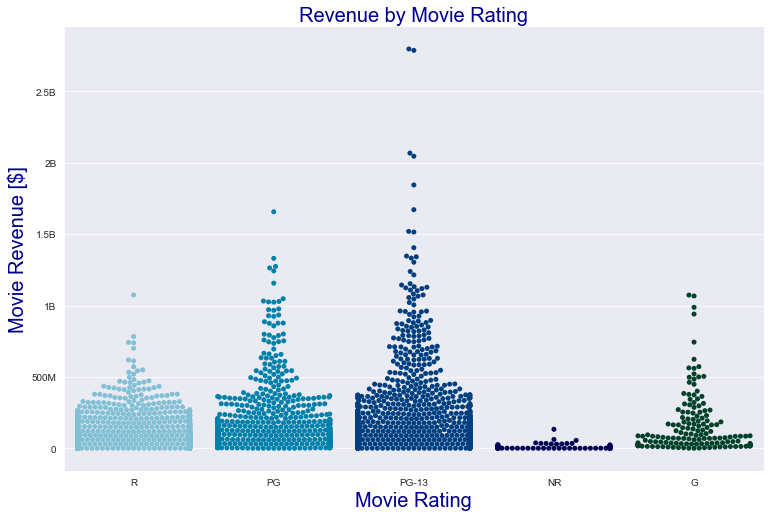

In [26]:
#PLOTTING REVENUE BY MOVIE RATING
sns.catplot(x="rating", y="movie_revenue", kind="swarm", data=filtered_rating_df,height=7, aspect=1.5,palette = ('ocean_r'))
sns.set_context('talk')
plt.title('Revenue by Movie Rating',fontsize=20, color = 'darkblue')
plt.ylabel('Movie Revenue [$]',fontsize=20, color = 'darkblue')
plt.xlabel('Movie Rating',fontsize=20, color = 'darkblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

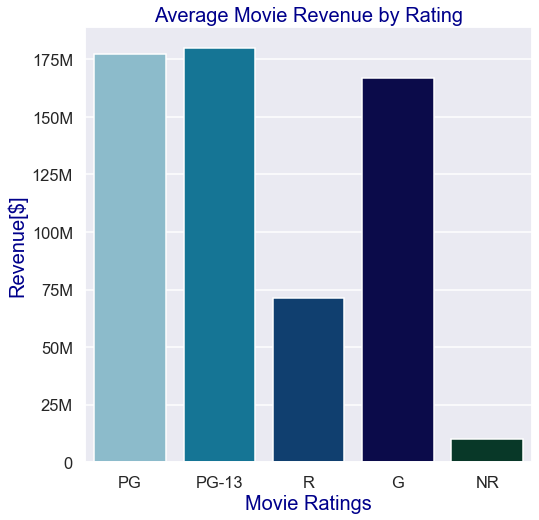

In [27]:
#GITTING AVERAGE MOVIE REVENUE PER MOVIE RATING
PG_df = df[(df['rating'] == 'PG')]
PG_mean_rev = round(PG_df['movie_revenue'].mean(),0)
R_df = df[(df['rating'] == 'R')]
R_mean_rev = round(R_df['movie_revenue'].mean(),0)
G_df = df[(df['rating'] == 'G')]
G_mean_rev = round(G_df['movie_revenue'].mean(),0)
PG_13_df = df[(df['rating'] == 'PG-13')]
PG_13_mean_rev = round(PG_13_df['movie_revenue'].mean(),0)
NR_df = df[(df['rating'] == 'NR')]
NR_mean_rev = round(NR_df['movie_revenue'].mean(),0)

#CREATING A LIST TO GRAPH
rating_list = ['PG','PG-13','R','G','NR']
mean_rev_list = [PG_mean_rev,PG_13_mean_rev,R_mean_rev,G_mean_rev,NR_mean_rev]

#GRAPHING AVERAGE MOVIE REVENUE BY RATING
plt.figure(figsize = (8,8))
sns.set_context('talk')

#SETTING STYLE FOR FUTURE PLOTS
sns.set_style('darkgrid')

barplot = sns.barplot(x=rating_list,y=mean_rev_list,palette = ('ocean_r'))

plt.title('Average Movie Revenue by Rating',y=1, fontsize=20, color = 'darkblue')
plt.ylabel('Revenue[$]',fontsize = 20,color = 'darkblue')
plt.xlabel('Movie Ratings',fontsize = 20,color = 'darkblue')



ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

plt.show()

**ANSWER:** 
- **Microsoft's new movie studio should look into mainly developing PG-13, PG, and G movies.**


- It can be seen on the graphs above that historically, movies intended for all / most audiences generate the most revenue.
- The most profitable movies in history were PG-13 movies, followed by PG movies. Historically, on average, G, PG, and PG-13 movies generate almost the same revenue.
- R and Non-Rated movies cannot compete with them.
- The hypothesis is that G, PG, and PG-13 movies have a much larger audience due to not having viewing restrictions. R rated movies are for adults only and NR movies aren't marketed the same way as other ratings.

# QUESTION 2: Correlation Between Movie Budget vs. Movie Revenue

In [28]:
#SEEING CORRELATION BETWEEN VALUES (aiming to see values that are +/-|0.5| and higher)
df.corr()[['movie_budget', 'user_score','movie_revenue']]

,movie_budget,user_score,movie_revenue
run_time,0.253689,0.277455,0.249066
user_score,-0.071166,1.000000,0.136743
movie_budget,1.000000,-0.071166,0.719274
movie_revenue,0.719274,0.136743,1.000000


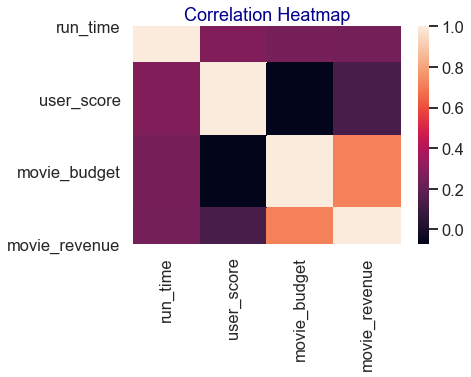

In [29]:
# A QUICK CORRELATION HEATMAP. NOT TOO RELEVANT
corr = df.corr()
heat = sns.heatmap(corr)
plt.title('Correlation Heatmap',fontsize=18, color = 'darkblue')
plt.show()

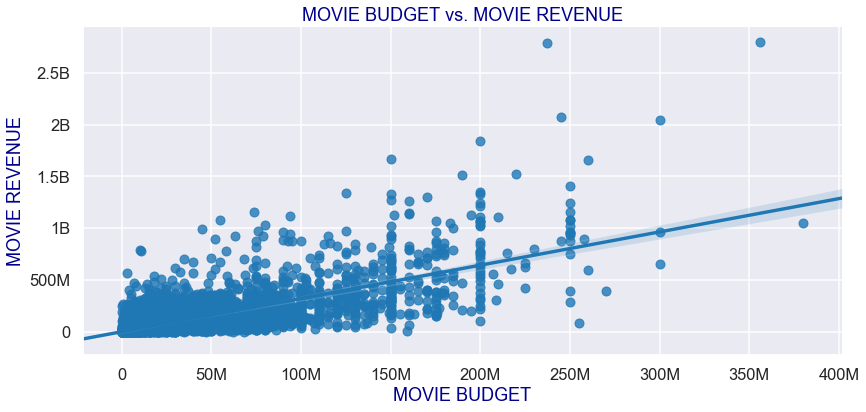

In [30]:
#GRAPHING MOVIE BUDGET VS MOVIE REVENUE
fig_1 = sns.lmplot(x="movie_budget", y="movie_revenue",fit_reg = True, data=df, height=6, aspect=2)
plt.title('MOVIE BUDGET vs. MOVIE REVENUE',fontsize=18, color = 'darkblue')
plt.ylabel('MOVIE REVENUE',fontsize=18, color = 'darkblue')
plt.xlabel('MOVIE BUDGET',fontsize=18, color = 'darkblue')

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

**ANSWER:**
- Microsoft should take in consideration the amount of money it is willing to invest on it's new movie studio.


- There is a **positive correlation of 0.712 between Movie Revenue and Movie Budget**. 
    - That means that the more a studio invests in a movie, the higher it's revenue will be. 
    - This is not a guarantee, since the correlation is not 1.0. Other factors may affect the success of a movie, such as actors, directors, genre, and rating.    

# HONORABLE MENTION 1: Correlation Between User_Score and Revenue

In [31]:
# #GROUPING MOVIE USER SCORES BY 10's
# df['user_score_tens'] = df.user_score // 10 * 10

In [32]:
# #GRAPHING MOVIE USER SCORE vs. MOVIE REVENUE
# sns.set_style('darkgrid')
# sns.lmplot(x="user_score_tens", y="movie_revenue", data=df,height=6, aspect=1.5, palette = ('ocean')).set(
#     title='MOVIE USER SCORE vs. MOVIE REVENUE', ylabel='MOVIE REVENUE',xlabel=('USER SCORE(10"s)'))
# sns.set_style('darkgrid')
# ax = plt.gca()
# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

# sns.catplot(x="user_score_tens", y="movie_revenue", kind="swarm", data=df,height=6, aspect=1.5).set(
#     title='MOVIE USER SCORE vs. MOVIE REVENUE', ylabel='MOVIE REVENUE',xlabel=('USER SCORE(10"s)'))
# sns.set_context('talk')
# ax = plt.gca()
# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
# plt.show()


Even though movie revenue and user score seem to be correlated by taking a quick look at the graphs, with further analysis, it becomes clear that both values aren't correlated. This topic wasn't worth investigating further.

# QUESTION 3: Most Profitable Genres and Genres R.O.I

In [33]:
#CREATING A MOST COMMON GENRE LIST
most_common_genre_list = ['Comedy','Drama','Romance','Science Fiction','Crime','Action','Horror',
                          'Thriller','Fantasy','Animation','Mystery','War','Adventure']
#GENRE DICTIONARY FOR THE FOR LOOP
genre_dict = {}

#FOR LOOP TO GET MOVIE REVENUE BASED ON GENRE     
for genre in most_common_genre_list:
    genre_dict[genre] = []
    for index,bol in enumerate(df['genre'].str.contains(genre)):
        if bol == True:
            if df['movie_revenue'][index] > 0:      
                genre_dict[genre].append(df['movie_revenue'][index])

genre_dict_2 = {}
#GET MOVIE BUDGET BASED ON GENRE    
for genre in most_common_genre_list:
    genre_dict_2[genre] = []
    for index,bol in enumerate(df['genre'].str.contains(genre)):
        if bol == True:
            if df['movie_budget'][index] > 0:      
                genre_dict_2[genre].append(df['movie_budget'][index])


In [34]:
#GET AVERAGE REVENUE PER GENRE
genre_dict_avg = {}
for genre in most_common_genre_list:
    genre_dict_avg[genre] = []
    avg = round(sum(genre_dict[genre])/len(genre_dict[genre]),0)
    genre_dict_avg[genre].append(avg)
avg_df = pd.DataFrame(genre_dict_avg).transpose()
avg_df.reset_index(inplace=True)
avg_df.columns = (['Genre','Average_Revenue'])
avg_df.sort_values('Average_Revenue',inplace=True)

#GET AVERAGE BUDGET PER GENRE
genre_dict_avg_bud = {}
for genre in most_common_genre_list:
    genre_dict_avg_bud[genre] = []
    avg = round(sum(genre_dict_2[genre])/len(genre_dict_2[genre]),0)
    genre_dict_avg_bud[genre].append(avg)
avg_df_bud = pd.DataFrame(genre_dict_avg_bud).transpose()
avg_df_bud.reset_index(inplace=True)
avg_df_bud.columns = (['Genre','Average_Budget'])
avg_df_bud.sort_values('Average_Budget',inplace=True)

In [35]:
#MERGING BOTH DF JUST FOR FUN
result = pd.merge(avg_df, avg_df_bud, how = 'outer')
result

,Genre,Average_Revenue,Average_Budget
0,Horror,64732908.0,18504421.0
1,Drama,80442956.0,28870276.0
2,Mystery,84665877.0,30594511.0
3,Crime,85998819.0,32408315.0
4,Thriller,97015867.0,35453192.0
5,Romance,98865346.0,28879719.0
6,War,101430698.0,39264475.0
7,Comedy,116516845.0,37282649.0
8,Action,193151000.0,62130099.0
9,Science Fiction,200487344.0,62205299.0


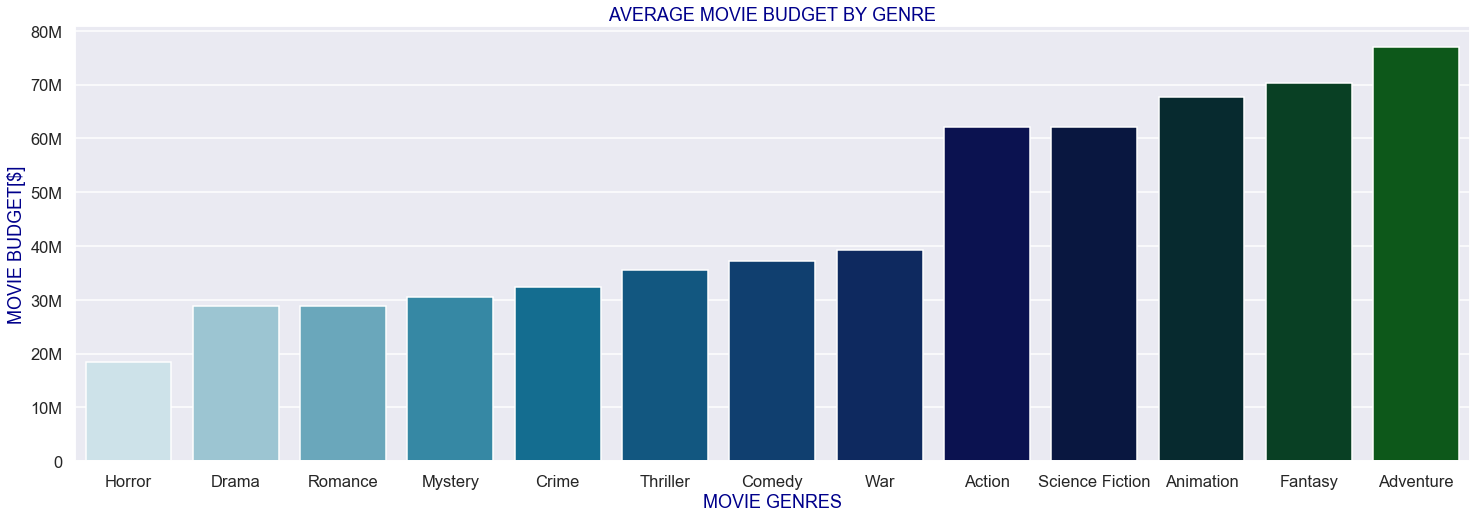

In [36]:
#CREATING AN AVERAGE MOVIE REVENUE BY GENRE GRAPH
plt.figure(figsize = (25,8))
avg_barplot = sns.barplot(x="Genre", y="Average_Budget",  data=avg_df_bud, palette = ('ocean_r'))
plt.title('AVERAGE MOVIE BUDGET BY GENRE',fontsize=18, color = 'darkblue')
plt.ylabel('MOVIE BUDGET[$]',fontsize=18, color = 'darkblue')
plt.xlabel('MOVIE GENRES',fontsize=18, color = 'darkblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

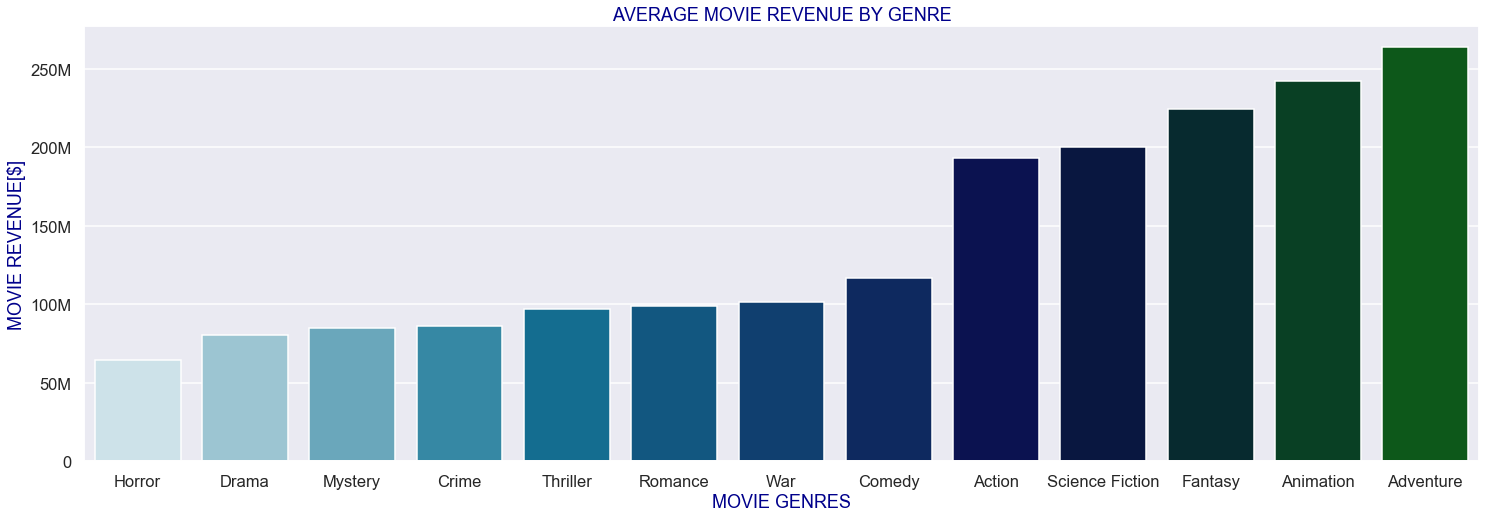

In [37]:
#CREATING A AVERAGE MOVIE BUDGET BY GENRE GRAPH
plt.figure(figsize = (25,8))
avg_barplot = sns.barplot(x="Genre", y="Average_Revenue",  data=avg_df ,palette = ('ocean_r'))
plt.title('AVERAGE MOVIE REVENUE BY GENRE',fontsize=18, color = 'darkblue')
plt.ylabel('MOVIE REVENUE[$]',fontsize=18, color = 'darkblue')
plt.xlabel('MOVIE GENRES',fontsize=18, color = 'darkblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

In [38]:
#GETTING AVERAGE RETURN OF INVESTMENT PER GENRE
genre_dict_ROI = {}
for genre in most_common_genre_list:
    genre_dict_ROI[genre] = []
    ROI = round((genre_dict_avg[genre][0])/(genre_dict_avg_bud[genre][0]),2)
    genre_dict_ROI[genre].append(ROI)
ROI_df = pd.DataFrame(genre_dict_ROI).transpose()
ROI_df.reset_index(inplace=True)
ROI_df.columns = (['Genre','Average_ROI'])
ROI_df.sort_values('Average_ROI',inplace=True)

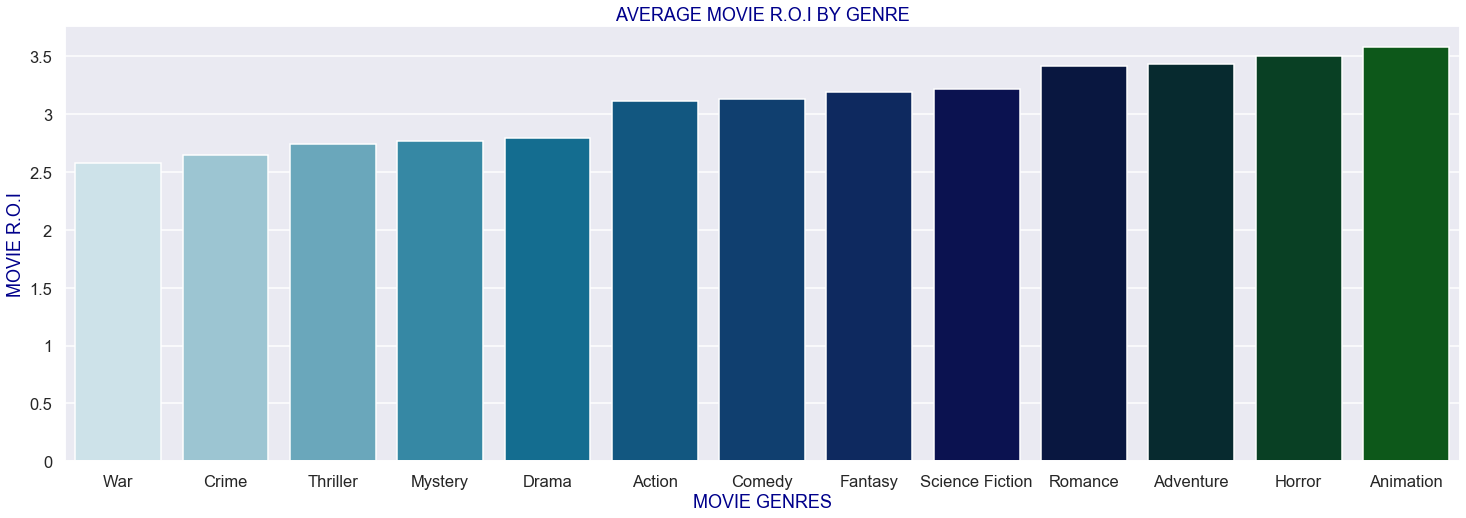

In [39]:
#GRAPHING AVERAGE MOVIE RETURN OF INVESTMENT PER GENRE
plt.figure(figsize = (25,8))
avg_barplot = sns.barplot(x="Genre", y="Average_ROI",  data=ROI_df,palette = ('ocean_r'))
plt.title('AVERAGE MOVIE R.O.I BY GENRE',fontsize=18, color = 'darkblue')
plt.ylabel('MOVIE R.O.I',fontsize=18, color = 'darkblue')
plt.xlabel('MOVIE GENRES',fontsize=18, color = 'darkblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

**ANSWER:**
- On average, the 3 most profitable genres are **adventure, animation, and fantasy**.
    - This was calculated by extracting the movie's revenue based on which genres it contained.
    - The average revenue and not total revenue was calculated because most movies have more than 1 genre listed,so it was a way to weight each genre. 
    - These 3 genres are also the ones that require the highest budget, so the studio needs to invest a lot of money to acquire those revenues.
    
    
- If Microsoft doesn't have **$100's of millions** to develop  such movies, it can invest in low budget movies that give the highest return of investment, such as **horror** and **romance** movies.

# HONORABLE MENTION 2: Most Profitable Actors and Directors (Historically)

In [40]:
# # #CREATING A LIST WITH ALL ACTORS NAMES
# actors_list = list(set(','.join(df['actors']).replace('[','').replace(']','').replace("'",'').replace('"','').split(',')))

# #CHECKING LEN OF ACTORS LIST
# print(len(actors_list))

# #CREATING A LIST WITH ALL DIRECTOR NAMES
# directors_list = list(set(','.join(director_df['director_list']).replace('[','').replace(']','').replace("'",'').replace('"','').split(',')))

# #CHECKING LEN OF ACTORS LIST
# print(len(directors_list))

In [41]:
# #CREATING A SECOND LIST TO REMOVE SPACES AT BEGINING OF NAMES
# actors_list_2 = []
# for name in actors_list:
#     if name.startswith(' '):
#         name = name.replace(' ','',1)
#         actors_list_2.append(name)
#     else:
#         actors_list_2.append(name)

# #CHECKING LEN OF LIST TO SEE IF IT MATCHES THE FIRST ONE
# len(actors_list_2)

In [42]:
# #CREATING A SECOND LIST TO REMOVE SPACES AT BEGINING OF NAMES
# directors_list_2 = []
# for name in directors_list:
#     if name.startswith(' '):
#         name = name.replace(' ','',1)
#         directors_list_2.append(name)
#     else:
#         directors_list_2.append(name)

# #CHECKING LEN OF LIST TO SEE IF IT MATCHES THE FIRST ONE
# len(directors_list_2)

In [43]:
# #ACTORS DICTIONARY FOR THE FOR LOOP
# actors_dict = {}

# #FOR LOOP TO GET MOVIE REVENUE BASED ON ACTORS     
# for actor in actors_list_2:
#     actors_dict[actor] = []
#     for index,bol in enumerate(df['actors'].str.contains(actor)):
#         if bol == True:
#             if df['movie_revenue'][index] > 0:      
#                 actors_dict[actor].append(df['movie_revenue'][index])


# directors_dict = {}
# #FOR LOOP TO GET MOVIE REVENUE BASED ON DIRECTORS     
# for director in directors_list_2:
#     directors_dict[director] = []
#     for index,bol in enumerate(director_df['director_list'].str.contains(director)):
#         if bol == True:
#             if df['movie_revenue'][index] > 0:      
#                 directors_dict[director].append(df['movie_revenue'][index])


In [44]:
# #GETTING ACTOR AVERAGE REVENUE
# actors_dict_avg = {}
# for actor in actors_list_2:
    
#     if len(actors_dict[actor]) > 0:
#         actors_dict_avg[actor] = []
#         avg = round(sum(actors_dict[actor])/len(actors_dict[actor]),0)
#         actors_dict_avg[actor].append(avg)
        
# #CREATING AN ACTOR AVG REVENUE DF 
# avg_actor_df = pd.DataFrame(actors_dict_avg).transpose()
# avg_actor_df.reset_index(inplace=True)
# avg_actor_df.columns = (['Actor','Average_Revenue'])
# avg_actor_df.sort_values('Average_Revenue',inplace=True, ascending = False)

In [45]:
# #CHECKING DF
# avg_actor_df[:10]

In [46]:
# #CREATING A AVERAGE MOVIE REVENUE BY ACTOR GRAPH
# plt.figure(figsize = (25,8))
# avg_barplot = sns.barplot(x="Actor", y="Average_Revenue",  data=avg_actor_df[:10] ,palette = ('ocean_r'))
# plt.title('TOP 10 ACTORS WITH HIGHEST AVERAGE MOVIE REVENUE',fontsize=18, color = 'darkblue')
# plt.ylabel('MOVIE REVENUE[$]',fontsize=18, color = 'darkblue')
# plt.xlabel('ACTORS',fontsize=18, color = 'darkblue')
# ax = plt.gca()
# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
# plt.show()

In [47]:
# #GETTING DIRECTOR AVERAGE MOVIE REVENUE
# directors_dict_avg = {}
# for director in directors_list_2:
    
#     if len(directors_dict[director]) > 0:
#         directors_dict_avg[director] = []
#         avg = round(sum(directors_dict[director])/len(directors_dict[director]),0)
#         directors_dict_avg[director].append(avg)
        
# #CREATING AN ACTOR AVG REVENUE DF 
# avg_director_df = pd.DataFrame(directors_dict_avg).transpose()
# avg_director_df.reset_index(inplace=True)
# avg_director_df.columns = (['director','Average_Revenue'])
# avg_director_df.sort_values('Average_Revenue',inplace=True, ascending = False)

In [48]:
# #CHECKING DF
# avg_director_df[:10]

In [49]:
# #CREATING A AVERAGE MOVIE REVENUE BY DIRECTOR GRAPH
# plt.figure(figsize = (30,8))
# avg_barplot = sns.barplot(x="director", y="Average_Revenue",  data=avg_director_df[:10] ,palette = ('ocean_r'))
# plt.title('TOP 10 DIRECTORS WITH HIGHEST AVERAGE MOVIE REVENUE',fontsize=18, color = 'darkblue')
# plt.ylabel('MOVIE REVENUE[$]',fontsize=18, color = 'darkblue')
# plt.xlabel('DIRECTORS',fontsize=18, color = 'darkblue')
# ax = plt.gca()
# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
# plt.show()

- While working on the most profitable directors and actors, it was noticed that it wouldn't be as relevant because since the Data Frame has information about movies going back to 1930's, the director/actor could not be at his/her prime or could even be dead. It was decided to analyze more recent movies.

# QUESTION 4 - Most Profitable Actors and Directors in Last 20 Years.

In [50]:
director_df = df.dropna(subset = ['director_list'])

In [51]:
#GETTING DECADE FROM MOVIE RELEASE DATE
df['decade'] = df['release_date'].map(lambda x : (x.year // 10 * 10))

In [52]:
#GETTING MOVIES FROM LAST 20 YEARS
last_20yr_df = df[df['decade'] > 2000]

In [53]:
#HAD TO CREATE A SEPERATE DF FOR DIRECTORS DUE TO CODE ERROR
director_df['decade'] = director_df['release_date'].map(lambda x : (x.year // 10 * 10))

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
#HAD TO CREATE A SEPERATE DF FOR DIRECTORS DUE TO CODE ERROR
director_last_20yr_df = director_df[director_df['decade'] > 2000]

In [55]:
# #CREATING A LIST WITH ALL ACTORS NAMES FROM LAST 20 YEARS
actors_list_3 = list(set(','.join(last_20yr_df['actors']).replace('[','').replace(']','').replace("'",'').replace('"','').split(',')))

#CHECKING LEN OF ACTORS LIST
print(len(actors_list_3))

#CREATING A LIST WITH ALL DIRECTOR NAMES FROM LAST 20 YEARS
directors_list_3 = list(set(','.join(director_last_20yr_df['director_list']).replace('[','').replace(']','').replace("'",'').replace('"','').split(',')))

#CHECKING LEN OF ACTORS LIST
print(len(directors_list_3))

10623
1750


In [56]:
#CREATING A SECOND LIST TO REMOVE SPACES AT BEGINING OF ACTOR NAMES
actors_list_4 = []
for name in actors_list_3:
    if name.startswith(' '):
        name = name.replace(' ','',1)
        actors_list_4.append(name)
    else:
        actors_list_4.append(name)

#CHECKING LEN OF LIST TO SEE IF IT MATCHES THE FIRST ONE
len(actors_list_4)

10623

In [57]:
#ACTORS DICTIONARY FOR THE FOR LOOP
actors_dict_2 = {}

#FOR LOOP TO GET MOVIE REVENUE BASED ON ACTORS     
for actor in actors_list_4:
    actors_dict_2[actor] = []
    for index,bol in enumerate(last_20yr_df['actors'].str.contains(actor)):
        if bol == True:
            if last_20yr_df['movie_revenue'].iloc[index] > 0:      
                actors_dict_2[actor].append(last_20yr_df['movie_revenue'].iloc[index])

In [58]:
#GETTING ACTOR AVERAGE REVENUE
actors_dict_sum = {}
for actor in actors_list_4:
    
    if len(actors_dict_2[actor]) > 0:
        actors_dict_sum[actor] = []
        sum_ = (sum(actors_dict_2[actor]))
        actors_dict_sum[actor].append(sum_)
        
#CREATING AN ACTOR AVG REVENUE DF 
sum_actor_df = pd.DataFrame(actors_dict_sum).transpose()
sum_actor_df.reset_index(inplace=True)
sum_actor_df.columns = (['Actor','Revenue_Sum'])
sum_actor_df.sort_values('Revenue_Sum',inplace=True, ascending = False)

In [59]:
#CREATING A SECOND LIST TO REMOVE SPACES AT BEGINING OF DIRECTOR NAMES
directors_list_4 = []
for name in directors_list_3:
    if name.startswith(' '):
        name = name.replace(' ','',1)
        directors_list_4.append(name)
    else:
        directors_list_4.append(name)

#CHECKING LEN OF LIST TO SEE IF IT MATCHES THE FIRST ONE
len(directors_list_4)

1750

In [60]:
directors_dict_2 = {}
#FOR LOOP TO GET MOVIE REVENUE BASED ON DIRECTORS     
for director in directors_list_4:
    directors_dict_2[director] = []
    for index,bol in enumerate(director_last_20yr_df['director_list'].str.contains(director)):
        if bol == True:
            if director_last_20yr_df['movie_revenue'].iloc[index] > 0:      
                directors_dict_2[director].append(director_last_20yr_df['movie_revenue'].iloc[index])


C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [61]:
#GETTING DIRECTOR MOVIE REVENUE SUM
directors_dict_sum = {}
for director in directors_list_4:
    
    if len(directors_dict_2[director]) > 0:
        directors_dict_sum[director] = []
        sum_ = (sum(directors_dict_2[director]))
        directors_dict_sum[director].append(sum_)
        
#CREATING A DIRECTOR REVENUE SUM DF 
sum_director_df = pd.DataFrame(directors_dict_sum).transpose()
sum_director_df.reset_index(inplace=True)
sum_director_df.columns = (['director','Revenue_Sum'])
sum_director_df.sort_values('Revenue_Sum',inplace=True, ascending = False)

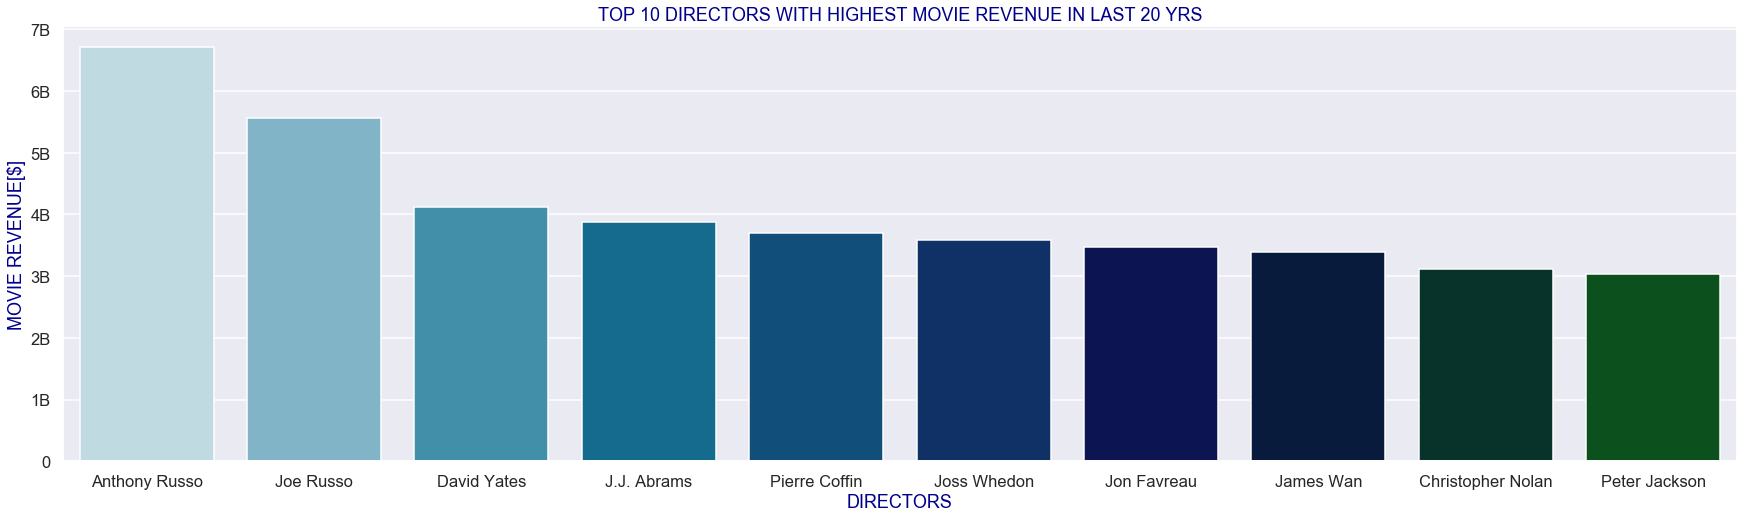

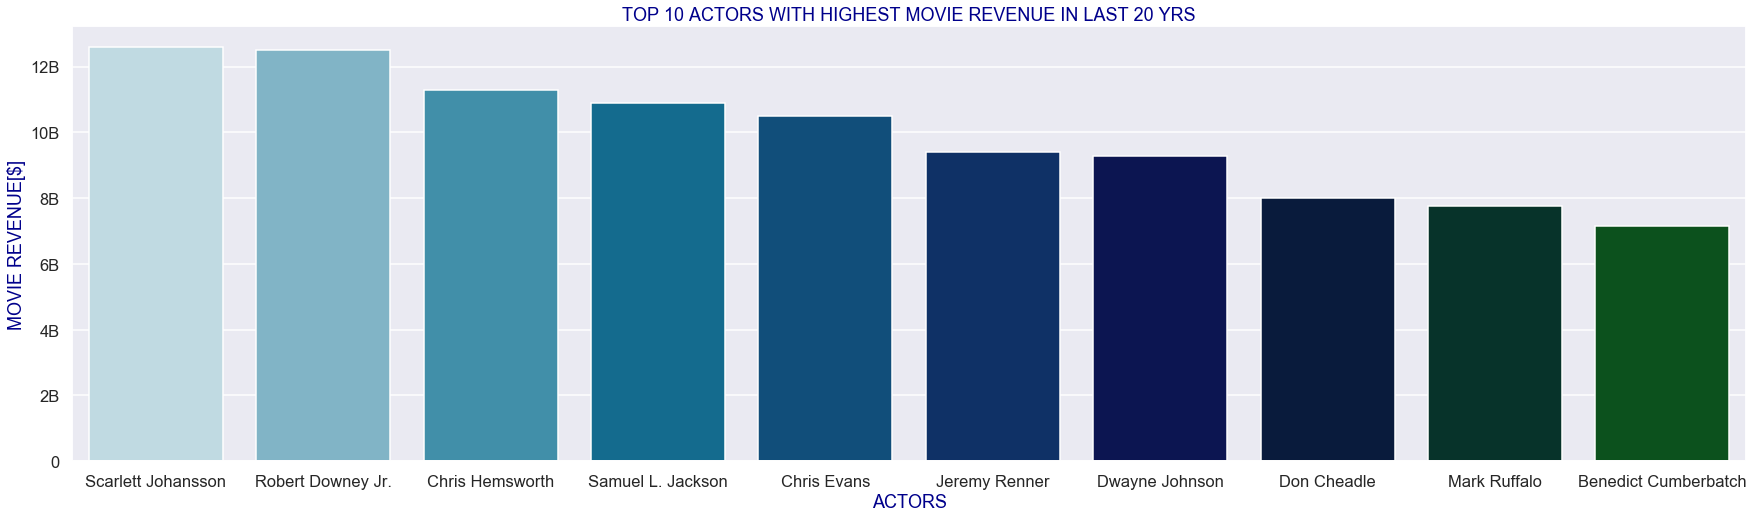

In [89]:
#CREATING A MOVIE REVENUE BY DIRECTOR GRAPH
plt.figure(figsize = (30,8))
avg_barplot = sns.barplot(x="director", y="Revenue_Sum",  data=sum_director_df[1:11] ,palette = ('ocean_r'))
plt.title('TOP 10 DIRECTORS WITH HIGHEST MOVIE REVENUE IN LAST 20 YRS',fontsize=18, color = 'darkblue')
plt.ylabel('MOVIE REVENUE[$]',fontsize=18, color = 'darkblue')
plt.xlabel('DIRECTORS',fontsize=18, color = 'darkblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

#CREATING A AVERAGE MOVIE REVENUE BY ACTOR GRAPH
plt.figure(figsize = (30,8))
avg_barplot = sns.barplot(x="Actor", y="Revenue_Sum",  data=sum_actor_df[2:12] ,palette = ('ocean_r'),)
plt.title('TOP 10 ACTORS WITH HIGHEST MOVIE REVENUE IN LAST 20 YRS',fontsize=18, color = 'darkblue')
plt.ylabel('MOVIE REVENUE[$]',fontsize=18, color = 'darkblue')
plt.xlabel('ACTORS',fontsize=18, color = 'darkblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

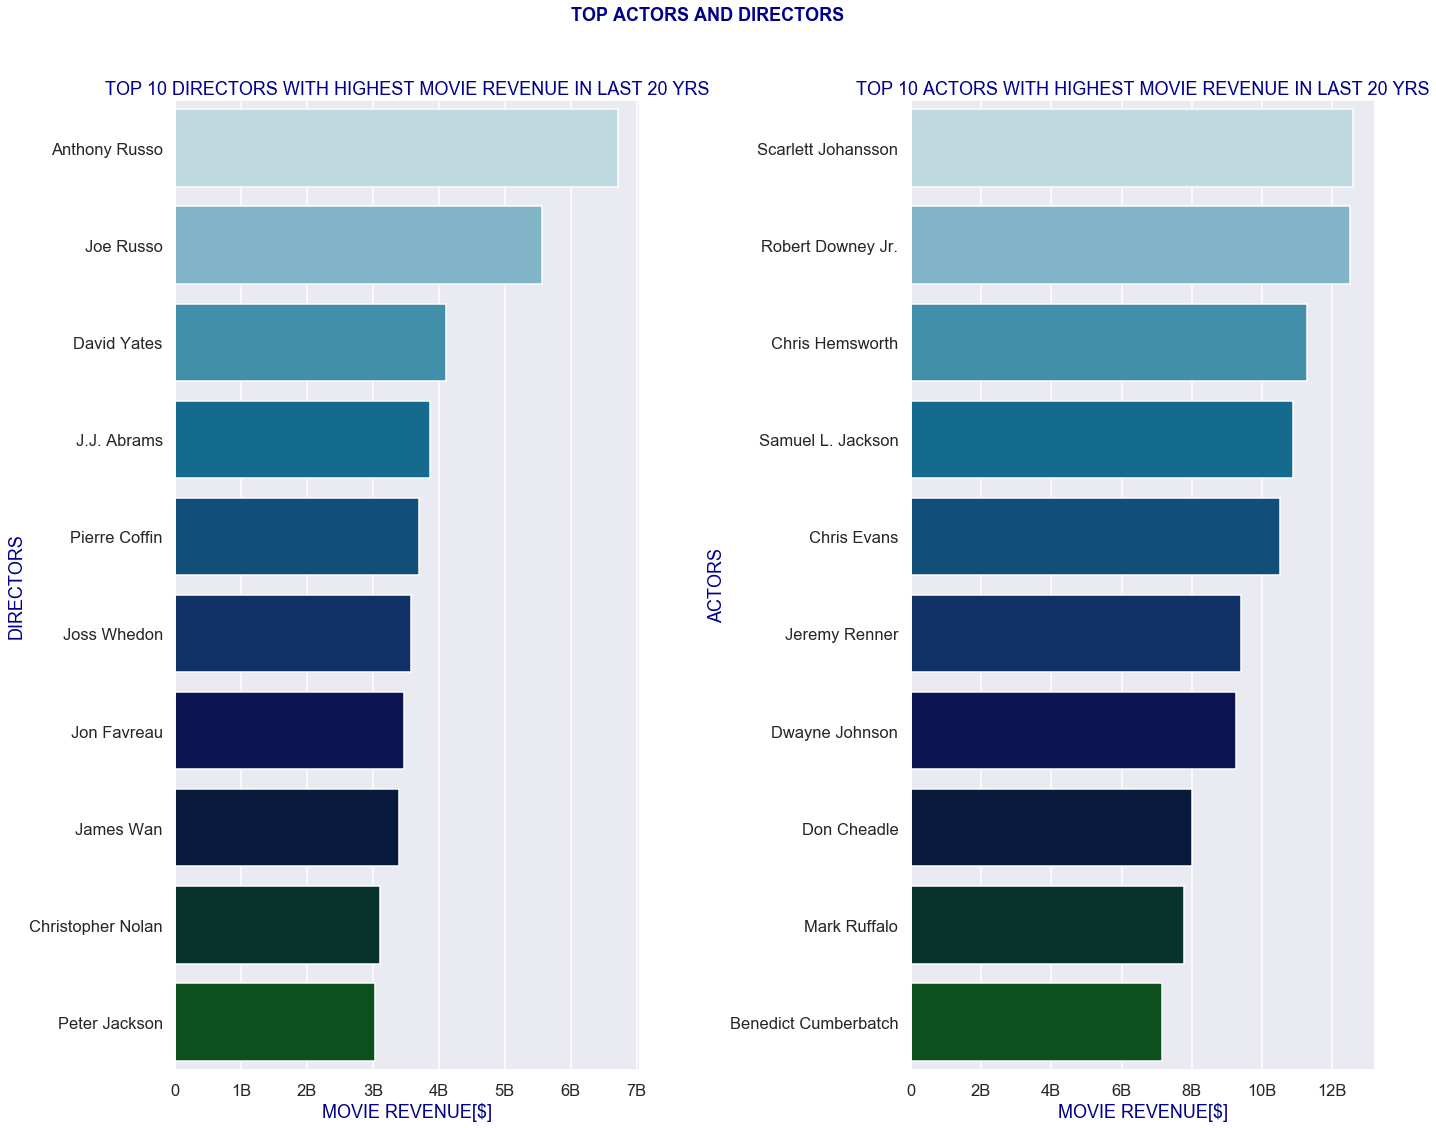

In [82]:
#CREATING A MOVIE REVENUE BY DIRECTOR GRAPH
fig,axes = plt.subplots(ncols=2,figsize = (20,15))
avg_barplot = sns.barplot(y="director", x="Revenue_Sum",  data=sum_director_df[1:11] ,palette = ('ocean_r'),
                         ax=axes[0],orient='h')
ax = axes[0]
ax.set_title('TOP 10 DIRECTORS WITH HIGHEST MOVIE REVENUE IN LAST 20 YRS',fontsize=18, color = 'darkblue')
ax.set_xlabel('MOVIE REVENUE[$]',fontsize=18, color = 'darkblue')
ax.set_ylabel('DIRECTORS',fontsize=18, color = 'darkblue')

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))


#CREATING A AVERAGE MOVIE REVENUE BY ACTOR GRAPH
avg_barplot = sns.barplot(y="Actor", x="Revenue_Sum",  data=sum_actor_df[2:12] ,palette = ('ocean_r'),
                         ax=axes[1],orient='h')
ax = axes[1]
ax.set_title('TOP 10 ACTORS WITH HIGHEST MOVIE REVENUE IN LAST 20 YRS',fontsize=18, color = 'darkblue')
ax.set_xlabel('MOVIE REVENUE[$]',fontsize=18, color = 'darkblue')
ax.set_ylabel('ACTORS',fontsize=18, color = 'darkblue')

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.suptitle('TOP ACTORS AND DIRECTORS',y=1.05,fontsize=18, color = 'darkblue',weight='bold')
plt.tight_layout()

**ANSWER:**
- The 10 most profitable directors in the last 20 years are Anthony Russo, Joe Russo, David Yates, J.J Abrams, Pierre Coffin, Joss Whedon, Jon Favreau, James Wan, Christopher Nolan, and Peter Jackson.
- The 10 most profitable actors/actresses in that last 20 years are Scarlett Johansson, Robert Downey Jr., Chris Hemsworth, Samuel L. Jackson, Chris Evans, Jeremy Renner, Dwayne Johnson, Don Cheadle, Mark Ruffalo, and Benedict Cumberbatch.


- **If Microsoft wants to create movies that are able to compete with today's top movies, they should look into hiring some of the directors and actors from the list above. More research needs to be done to determine in which movie genre they were most successful.**


# CONCLUSION

**In order to create successful movies, Microsoft needs to do the following.**
- Be willing to invest a lot of money. As shown in the movie budget vs movie revenue correlation, the more money that is invested into creating a movie, the higher the return will be. The money needs to be invested properly, by picking the appropriate movie ratings and genres.


- Historically, most movies developed have been rated for all/most audiences. The reason for that is that PG-13, PG, and G rated movies generate the most income due to their ability to reach most audiences. 


- Also, the most successful movie genres are also the ones that require the highest investment. If Microsoft doesn't want to invest too much, a good alternative would be Horror and Romance movies because they give a high return of investment. **PLEASE STAY AWAY FROM WAR MOVIES!**


- In order to create profitable movies, Microsoft will need to hire the best directors and actors available in the market today. By picking the most profitable directors and actors of the last 20 years, it is almost certain that they will create an extraordinary movie. More research is needed in order to place such directors and actors in the appropriate movie genres in order to guarantee success.
